# Lab 3:  Quantum Computing Algorithms Q4
* Author: B08901049 Yuan-Chia Chang
* Instructor: Professor Hao-Chung Cheng
* TA: Chia-Yi Chou
* Created: 10/31/2021(Sun)
* Last edited: 10/31/2021(Sun)
* Contact: b08901049@ntu.edu.tw
* Collaborator: B08901002 Chen-Han Lin, B08901209 Yu-Hsiang Lin

In [1]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

## 4

In [2]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(power):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U

In [22]:
# Specify variables
n_count = 8  # number of counting qubits
a = 13

In [9]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

In [23]:
# Create QuantumCircuit with n_count counting qubits
# plus 4 qubits for U to act on
qc = QuantumCircuit(n_count + 4, n_count)

# Initialize counting qubits
# in state |+>
for q in range(n_count):
    qc.h(q)
    
# And auxiliary register in state |1>
qc.x(3+n_count)

# Do controlled-U operations
for q in range(n_count):
    qc.append(c_amod15(a, 2**q), 
             [q] + [i+n_count for i in range(4)])

# Do inverse-QFT
qc.append(qft_dagger(n_count), range(n_count))

# Measure circuit
qc.measure(range(n_count), range(n_count))
qc.draw(fold=-1)  # -1 means 'do not fold' 

┌───┐                                                                                                                                     ┌───────┐┌─┐                     
 q_0: ┤ H ├───────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0      ├┤M├─────────────────────
      ├───┤       │                                                                                                                             │       │└╥┘┌─┐                  
 q_1: ┤ H ├───────┼───────────────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────┤1      ├─╫─┤M├──────────────────
      ├───┤       │               │                                                                                                             │       │ ║ └╥┘┌─┐               
 q_2: ┤ H ├───────┼───────────────┼───────────────■─────────────────────────────────────────────────────────────────────────────────────────────┤2      ├─╫──╫─┤M├───────────────
      ├───┤       │               │               │                                                                                             │       │ ║  ║ └╥┘┌─┐            
 q_3: ┤ H ├───────┼───────────────┼───────────────┼───────────────■─────────────────────────────────────────────────────────────────────────────┤3      ├─╫──╫──╫─┤M├────────────
      ├───┤       │               │               │               │                                                                             │  QFT† │ ║  ║  ║ └╥┘┌─┐         
 q_4: ┤ H ├───────┼───────────────┼───────────────┼───────────────┼────────────────■────────────────────────────────────────────────────────────┤4      ├─╫──╫──╫──╫─┤M├─────────
      ├───┤       │               │               │               │                │                                                            │       │ ║  ║  ║  ║ └╥┘┌─┐      
 q_5: ┤ H ├───────┼───────────────┼───────────────┼───────────────┼────────────────┼────────────────■───────────────────────────────────────────┤5      ├─╫──╫──╫──╫──╫─┤M├──────
      ├───┤       │               │               │               │                │                │                                           │       │ ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_6: ┤ H ├───────┼───────────────┼───────────────┼───────────────┼────────────────┼────────────────┼────────────────■──────────────────────────┤6      ├─╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤       │               │               │               │                │                │                │                          │       │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_7: ┤ H ├───────┼───────────────┼───────────────┼───────────────┼────────────────┼────────────────┼────────────────┼────────────────■─────────┤7      ├─╫──╫──╫──╫──╫──╫──╫─┤M├
      └───┘┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐┌───────┴───────┐┌───────┴───────┐┌───────┴────────┐└───────┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
 q_8: ─────┤0             ├┤0             ├┤0             ├┤0             ├┤0              ├┤0              ├┤0              ├┤0               ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │              ││              ││              ││              ││               ││               ││               ││                │          ║  ║  ║  ║  ║  ║  ║  ║ 
 q_9: ─────┤1             ├┤1             ├┤1             ├┤1             ├┤1              ├┤1              ├┤1              ├┤1               ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │  13^1 mod 15 ││  13^2 mod 15 ││  13^4 mod 15 ││  13^8 mod 15 ││  13^16 mod 15 ││  13^32 mod 15 ││  13^64 mod 15 ││  13^128 mod 15 │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_10: ─────┤2             ├┤2             ├┤2             ├┤2             ├┤2              ├┤2              ├┤2              ├┤2               ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
      ┌───┐│              ││              ││              ││              ││              

C:\Users\USER\anaconda3\envs\IBMQ\lib\site-packages\qiskit\utils\deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


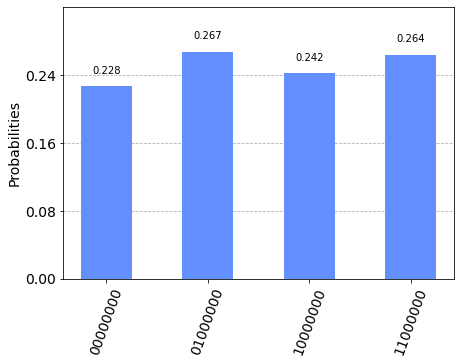

In [24]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
qobj = assemble(t_qc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [25]:
import pandas as pd
from fractions import Fraction
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2) # Convert (base 2) string to decimal
    phase = decimal/(2**n_count) # Find corresponding eigenvalue
    measured_phases.append(phase)
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, "%i/%i" % (frac.numerator, frac.denominator), frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)


   Phase Fraction  Guess for r
0   0.25      1/4            4
1   0.75      3/4            4
2   0.50      1/2            2
3   0.00      0/1            1


## Reference

[1] https://qiskit.org/textbook/ch-algorithms/shor.html